Вариант 6.
Рост популяции крыс в вольере описывается уравнением Ферхюльста. Емкость экологиче-
ской ниши для нее равна K = 1000. Постройте точный и приближенный графики динамики
численности популяции и сведите результаты в таблицу, если известно, что начальная числен-
ность равна: 10, скорость роста r равна 0, 5 день−1 в течение 100 дней.

In [45]:
import numpy as np
import matplotlib.pyplot as plt

"""
import matplotlib.pyplot as plt

plt.plot(xData, yData, linestyle="plt.linestyle")
plt.title("")
plt.ylabel("")
plt.xlabel("")
plt.show()



"""

'\nimport matplotlib.pyplot as plt\n\nplt.plot(xData, yData, linestyle="plt.linestyle")\nplt.title("")\nplt.ylabel("")\nplt.xlabel("")\nplt.show()\n\n\n\n'

In [46]:
def get_exact_solve(t0, t1, y0, r, K, h=0.01):
    delta = r / K
    timeline = np.linspace(t0, t1, int((t1 - t0) / h))
    C=(r-delta*y0)*np.exp(r*t0)/(y0*r)
    exact_solve = lambda t: r/(delta+C*r*np.exp(-r*t))
    point_of_exact_solve = list(map(exact_solve, timeline))

    plt.plot(timeline, point_of_exact_solve, label='exact_solve_of_population')
    return exact_solve, point_of_exact_solve

def get_approx_solve(t0, t1, y0, r, K, n=100):
    h=(t1-t0)/n;
    Y = np.zeros((n + 1, 1))
    timeline = np.linspace(t0, t1, n + 1)
    delta = r / K
    Y[0] = y0
    for i in range(n):
        Y[i+1]=Y[i]+h*Y[i]*(r-delta*Y[i])
    plt.plot(timeline, Y, label='approx_solve_of_population')
    return Y
    


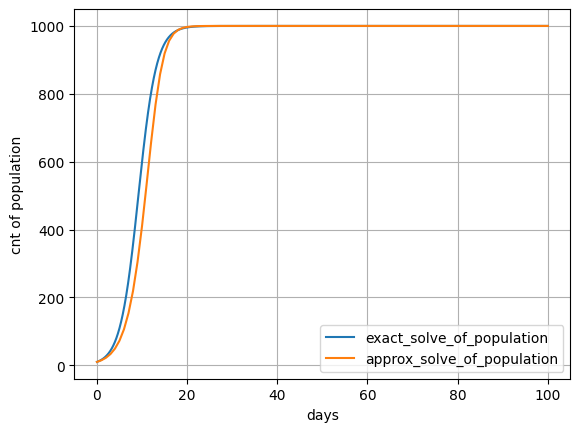

In [47]:
get_exact_solve(0, 100, 10, 0.5, 1000)
get_approx_solve(0, 100, 10, 0.5, 1000)
plt.xlabel("days")
plt.ylabel("cnt of population")
plt.legend()
plt.grid()
plt.show()

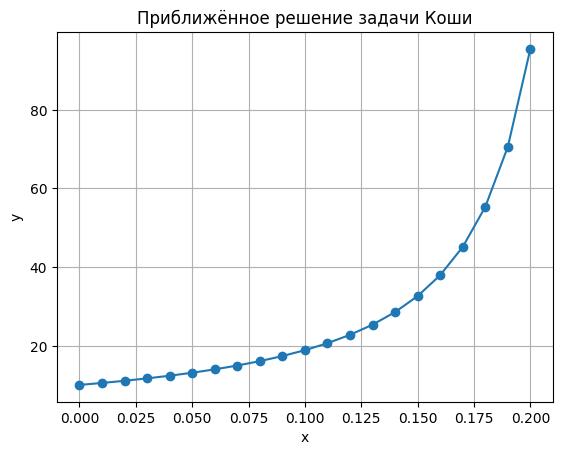

In [48]:


def euler_method(f, x0, y0, x_end, h):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    while x < x_end:
        x = x + h
        y = y + h * f(x, y)
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

r = 0.5
x0 = 0
y0 = 10
x_end = 0.2
h = 0.01

# Пример функции
def f(x, y):
    return r * y * y

# Параметры задачи


# Решение
x_vals, y_vals = euler_method(f, x0, y0, x_end, h)

# Построение графика
plt.plot(x_vals, y_vals, marker='o')
plt.title("Приближённое решение задачи Коши")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
# plt.legend()
plt.show()


C:\Users\games\AppData\Local\Temp\ipykernel_19028\1303977735.py:1: RuntimeWarning: divide by zero encountered in divide
  true_solve = lambda x: 2 / (0.2 - x)


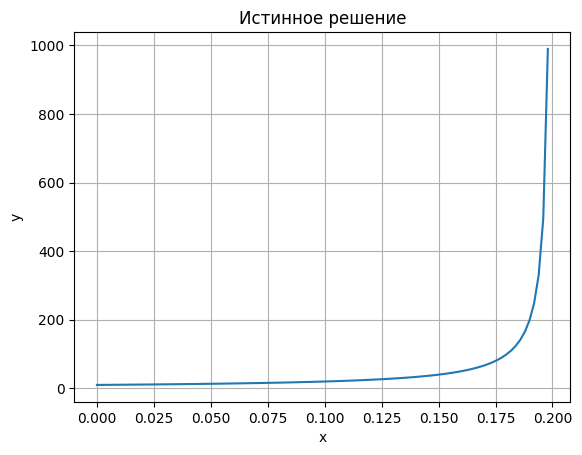

In [49]:
true_solve = lambda x: 2 / (0.2 - x)
x = np.linspace(0, 0.2, 100)
plt.plot(x, true_solve(x))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Истинное решение")
plt.grid(True)
plt.show()

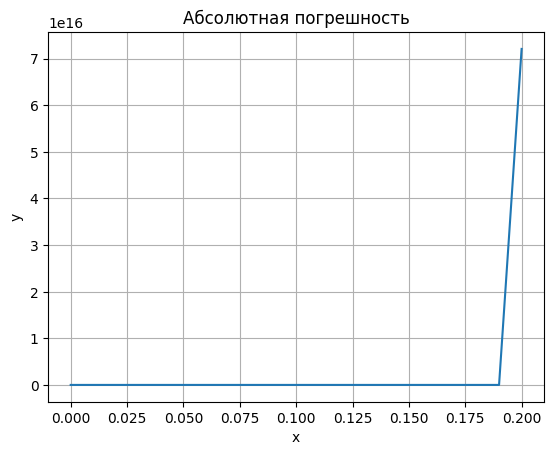

In [50]:
plt.plot(x_vals, abs(true_solve(np.array(x_vals)) - y_vals))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Абсолютная погрешность")
plt.grid(True)
plt.show()

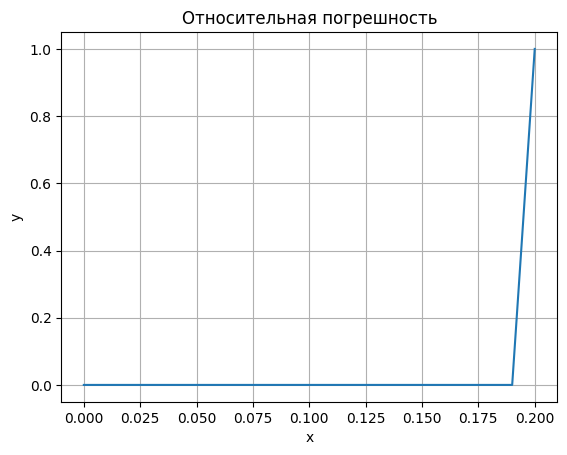

In [51]:
yres = true_solve(np.array(x_vals)) - y_vals
plt.plot(x_vals, abs(yres) / (max(abs(min(yres)), abs(max(yres)))))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Относительная погрешность")
plt.grid(True)
plt.show()

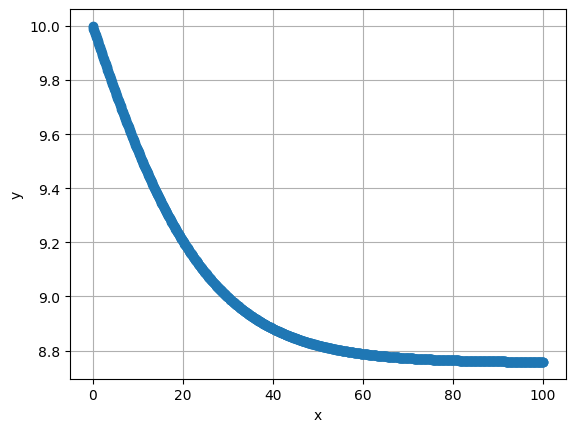

In [62]:
A, B, R, P, K = 10, 1, 0.5, 10, 1000
r = 0.5
x0 = 0
y0 = 10
x_end = 100
h = 0.1

def f(x, y):
    return R * y * (1 - (y / K)) - B * P * ((y * y) / (A * A + y * y))
x_vals, y_vals = euler_method(f, x0, y0, x_end, h)

# Построение графика
plt.plot(x_vals, y_vals, marker='o')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
# plt.legend()
plt.show()